In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
enc = pd.read_csv('/content/KL_encoded_data.csv')

In [3]:
enc

,Bathrooms,Car Parks,Size,Type,No_of_Bedrooms,No_of_servant_rooms,studio_apartment,Location_Ampang,Location_Ampang Hilir,Location_Bandar Damai Perdana,...,Property Type Supergroup_Townhouse,type_Bronze,type_Deluxe,type_Gold,type_Silver,size_type_Extra Large,size_type_Large,size_type_Medium,size_type_Small,Price
0,3,2,1335.035,0,2,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1250000.0
1,4,2,1875.075,0,3,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1030000.0
2,3,2,1513.013,0,4,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,900000.0
3,5,4,7200.000,1,4,2,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5350000.0
4,4,4,3600.000,1,5,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,3,2,1003.003,0,3,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,545000.0
9119,3,2,1250.050,0,3,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,699000.0
9120,4,2,1699.099,0,3,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,935000.0
9121,3,2,1719.019,0,3,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,970000.0


<Axes: xlabel='Price', ylabel='Density'>

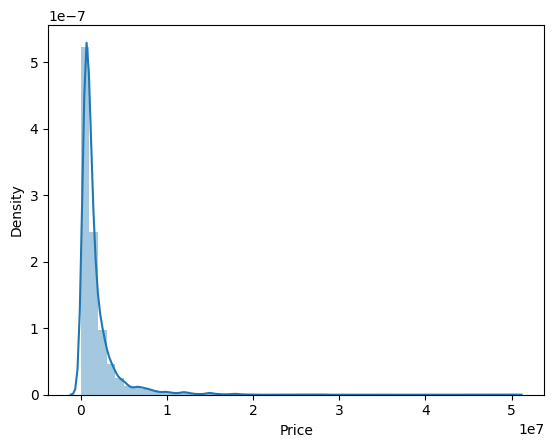

In [4]:
sns.distplot(enc['Price'])

In [5]:
# Skewness and Kurtosis
print("Skewness : %f" % enc['Price'].skew())
print("Kurtosis : %f" % enc['Price'].kurt())

Skewness : 5.429539
Kurtosis : 56.623960


In [6]:
target = np.log(enc.Price)
print("Skewness : %f" % target.skew())
print("Kurtosis : %f" % target.kurt())

Skewness : -0.639377
Kurtosis : 7.096379


In [7]:
numeric_features = enc.select_dtypes(include=[np.number])
numeric_features.dtypes

Bathrooms                  int64
Car Parks                  int64
Size                     float64
Type                       int64
No_of_Bedrooms             int64
                          ...   
size_type_Extra Large    float64
size_type_Large          float64
size_type_Medium         float64
size_type_Small          float64
Price                    float64
Length: 87, dtype: object

In [8]:
print(enc.describe(include=['number']).loc[['min','max','mean']].T.sort_values('max'))

                         min         max          mean
Location_Other           0.0         1.0  1.973251e-03
Location_Taman Desa      0.0         1.0  2.247314e-02
Location_Sunway SPK      0.0         1.0  3.288752e-03
Location_Sungai Besi     0.0         1.0  1.754001e-02
Location_Sri Petaling    0.0         1.0  1.151063e-02
...                      ...         ...           ...
Bathrooms                1.0        20.0  3.054478e+00
No_of_Bedrooms           0.0        21.0  3.175052e+00
Car Parks                1.0        28.0  2.106873e+00
Size                     0.0    790000.0  2.348540e+03
Price                  850.0  50000000.0  1.749080e+06

[87 rows x 3 columns]


In [9]:
corr = numeric_features.corr()

print (corr['Price'].sort_values(ascending=False)[:5], '\n')
print (corr['Price'].sort_values(ascending=False)[-5:])

Price                                1.000000
type_Deluxe                          0.751354
size_type_Extra Large                0.670750
Bathrooms                            0.657031
Property Type Supergroup_Bungalow    0.628303
Name: Price, dtype: float64 

Property Type Supergroup_Condominium   -0.179992
size_type_Small                        -0.223293
type_Silver                            -0.238328
size_type_Medium                       -0.259758
type_Bronze                            -0.341733
Name: Price, dtype: float64


In [15]:
enc.isnull().sum()

Bathrooms                0
Car Parks                0
Size                     0
Type                     0
No_of_Bedrooms           0
                        ..
size_type_Extra Large    1
size_type_Large          1
size_type_Medium         1
size_type_Small          1
Price                    1
Length: 87, dtype: int64

In [16]:
enc.dropna(inplace=True)

In [19]:
print(enc.describe(include=['number']).loc[['min','max','mean']].T.sort_values('max'))

                         min         max          mean
Location_Other           0.0         1.0  1.973251e-03
Location_Taman Desa      0.0         1.0  2.247314e-02
Location_Sunway SPK      0.0         1.0  3.288752e-03
Location_Sungai Besi     0.0         1.0  1.754001e-02
Location_Sri Petaling    0.0         1.0  1.151063e-02
...                      ...         ...           ...
Bathrooms                1.0        20.0  3.054484e+00
No_of_Bedrooms           0.0        21.0  3.174962e+00
Car Parks                1.0        28.0  2.106884e+00
Size                     0.0    790000.0  2.348620e+03
Price                  850.0  50000000.0  1.749080e+06

[87 rows x 3 columns]


In [18]:
corr = numeric_features.corr()

print (corr['Price'].sort_values(ascending=False)[:5], '\n')
print (corr['Price'].sort_values(ascending=False)[-5:])

Price                                1.000000
type_Deluxe                          0.751354
size_type_Extra Large                0.670750
Bathrooms                            0.657031
Property Type Supergroup_Bungalow    0.628303
Name: Price, dtype: float64 

Property Type Supergroup_Condominium   -0.179992
size_type_Small                        -0.223293
type_Silver                            -0.238328
size_type_Medium                       -0.259758
type_Bronze                            -0.341733
Name: Price, dtype: float64


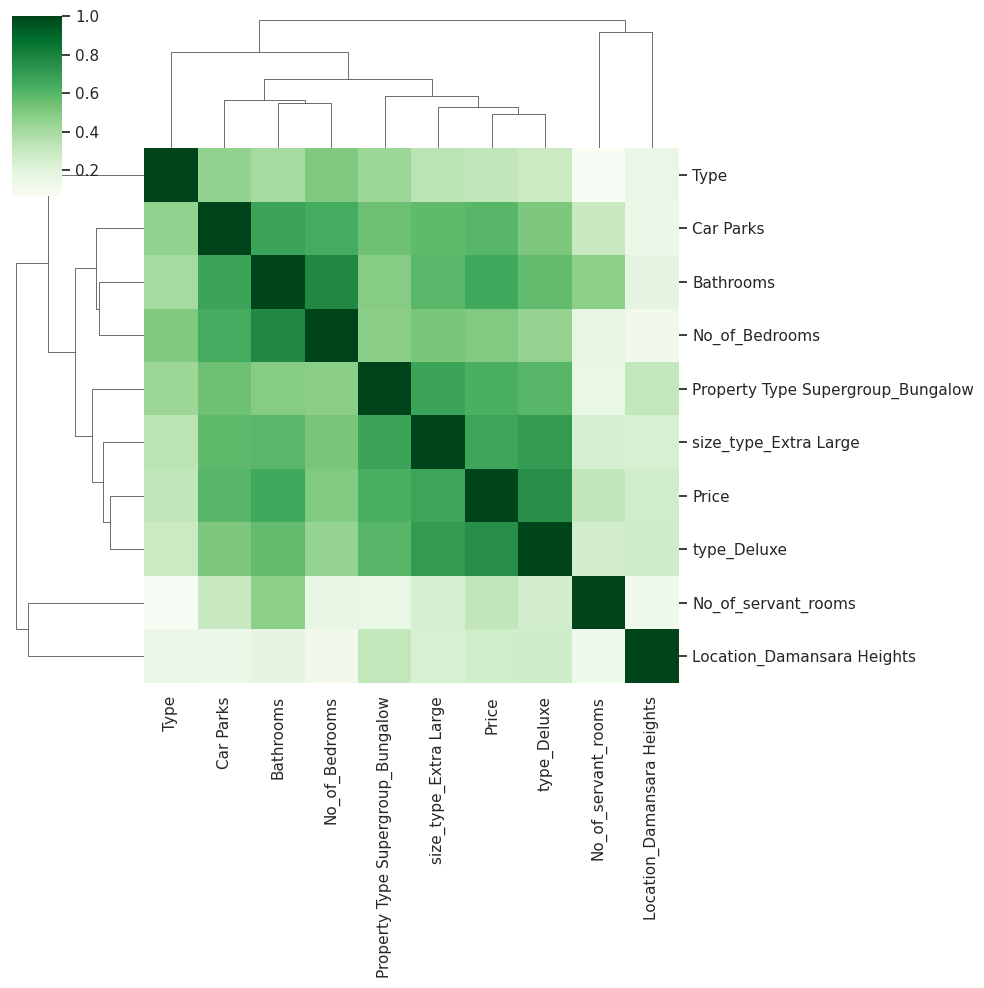

In [17]:
#'Price' Correlation Matrix
k = 10
cols = corr.nlargest(k , 'Price')['Price'].index
cm = np.corrcoef(enc[cols].values.T)
sns.set(font_scale = 1.00)
hm = sns.clustermap(cm , cmap = "Greens",cbar = True,square = True,
                 yticklabels = cols.values, xticklabels = cols.values)

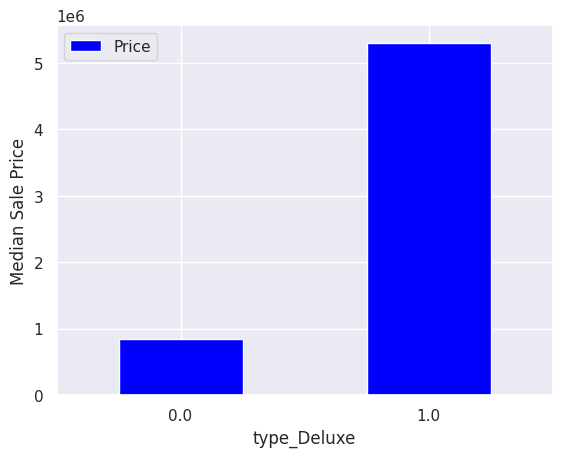

In [21]:
type_Deluxe_pivot = enc.pivot_table(index='type_Deluxe',
                                  values='Price', aggfunc=np.median)
type_Deluxe_pivot.plot(kind='bar', color='blue')
plt.xlabel('type_Deluxe')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

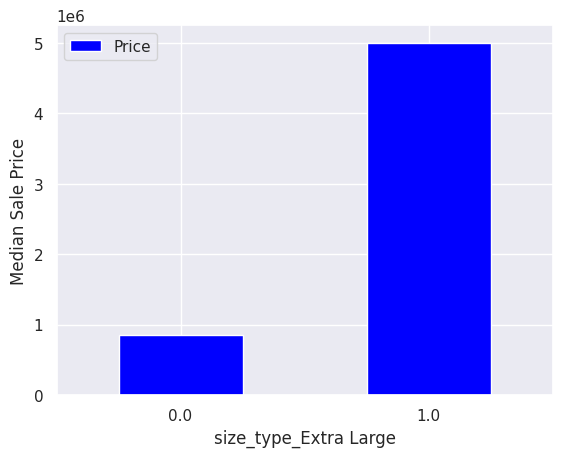

In [23]:
size_type_Extra_Large_pivot = enc.pivot_table(index='size_type_Extra Large',
                                  values='Price', aggfunc=np.median)
size_type_Extra_Large_pivot.plot(kind='bar', color='blue')
plt.xlabel('size_type_Extra Large')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

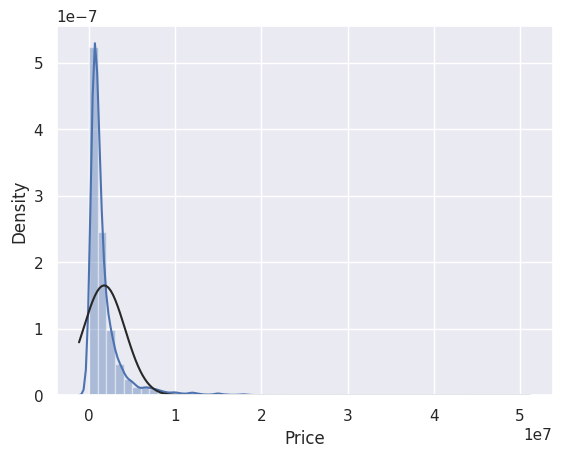

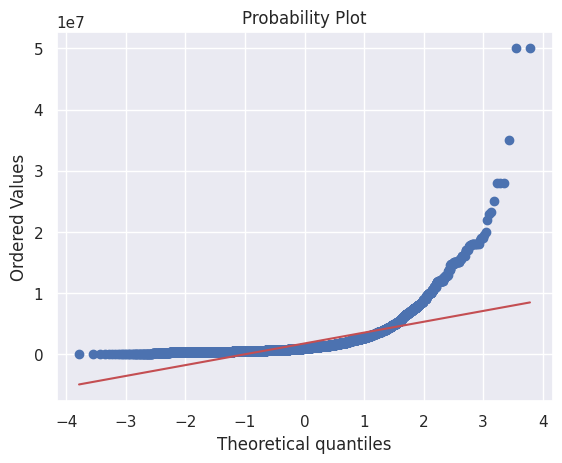

In [24]:
# Histogram and normal probability plot
sns.distplot(enc['Price'], fit = norm)
fig = plt.figure()
res = stats.probplot(enc['Price'],plot = plt)

In [25]:
enc.columns

Index(['Bathrooms', 'Car Parks', 'Size', 'Type', 'No_of_Bedrooms',
       'No_of_servant_rooms', 'studio_apartment', 'Location_Ampang',
       'Location_Ampang Hilir', 'Location_Bandar Damai Perdana',
       'Location_Bandar Menjalara', 'Location_Bandar Tasik Selatan',
       'Location_Bangsar', 'Location_Bangsar South', 'Location_Batu Caves',
       'Location_Brickfields', 'Location_Bukit Bintang',
       'Location_Bukit Jalil', 'Location_Bukit Tunku (Kenny Hills)',
       'Location_Cheras', 'Location_City Centre',
       'Location_Country Heights Damansara', 'Location_Damansara',
       'Location_Damansara Heights', 'Location_Desa Pandan',
       'Location_Desa ParkCity', 'Location_Desa Petaling', 'Location_Dutamas',
       'Location_Jalan Ipoh', 'Location_Jalan Klang Lama (Old Klang Road)',
       'Location_Jalan Kuching', 'Location_Jalan Sultan Ismail',
       'Location_Jinjang', 'Location_KL City', 'Location_KL Eco City',
       'Location_KL Sentral', 'Location_KLCC', 'Location_Ke

In [26]:
corr = numeric_features.corr()

print (corr['Price'].sort_values(ascending=False)[:5], '\n')
print (corr['Price'].sort_values(ascending=False)[-5:])

Price                                1.000000
type_Deluxe                          0.751354
size_type_Extra Large                0.670750
Bathrooms                            0.657031
Property Type Supergroup_Bungalow    0.628303
Name: Price, dtype: float64 

Property Type Supergroup_Condominium   -0.179992
size_type_Small                        -0.223293
type_Silver                            -0.238328
size_type_Medium                       -0.259758
type_Bronze                            -0.341733
Name: Price, dtype: float64


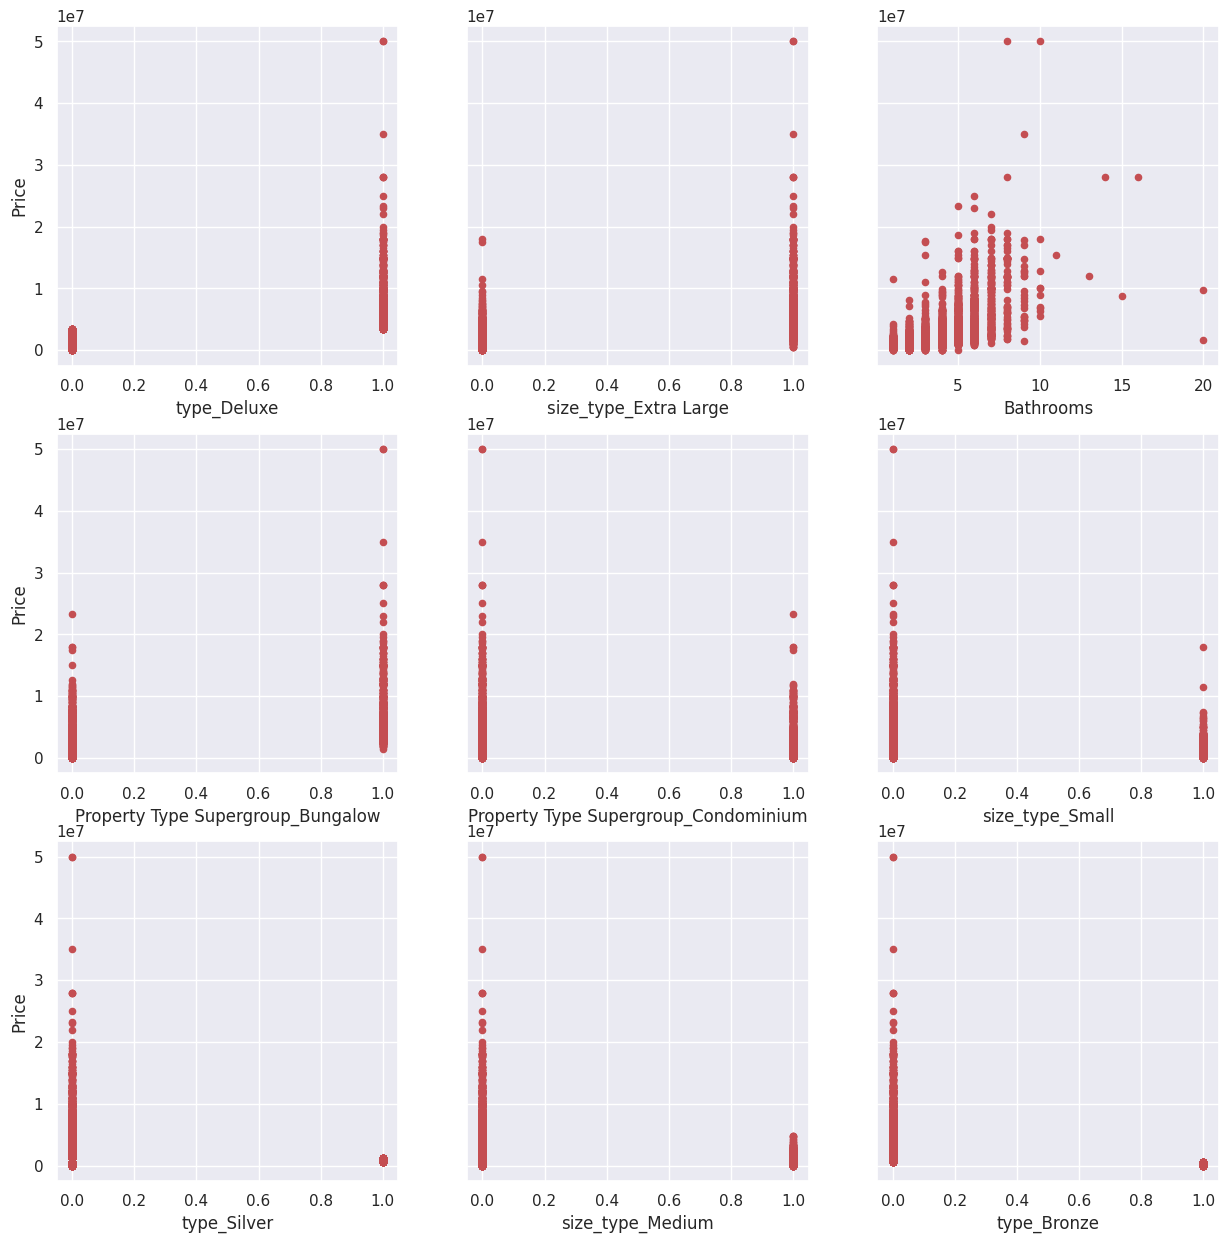

In [46]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
axes = np.ravel(axes)
col_name = ['type_Deluxe','size_type_Extra Large','Bathrooms','Property Type Supergroup_Bungalow','Property Type Supergroup_Condominium','size_type_Small','type_Silver','size_type_Medium','type_Bronze',]
for i, c in zip(range(12), col_name):
    enc.plot.scatter(ax=axes[i], x=c, y='Price', sharey=True, colorbar=False, c='r')